In [1]:
import obspy
import numpy as np
import os
from mseed2npy import preprocess_stream

In [17]:
st = obspy.read("raw_mseeds/gazk.mseed")
st

119 Trace(s) in Stream:

KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T00:10:19.610000Z | 100.0 Hz, 72128 samples
...
(117 other traces)
...
KO.GAZK..HHZ | 2020-09-09T22:40:24.490000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 72163 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [32]:
st[0].stats.starttime-st[0].stats.endtime

-82448.38

In [33]:
82448.38//30

2748.0

In [18]:
st.merge(fill_value=9999999)

3 Trace(s) in Stream:
KO.GAZK..HHN | 2020-09-08T23:58:17.630000Z - 2020-09-09T22:52:26.010000Z | 100.0 Hz, 8244839 samples
KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T22:52:27.700000Z | 100.0 Hz, 8244937 samples
KO.GAZK..HHZ | 2020-09-08T23:58:17.730000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 8244839 samples

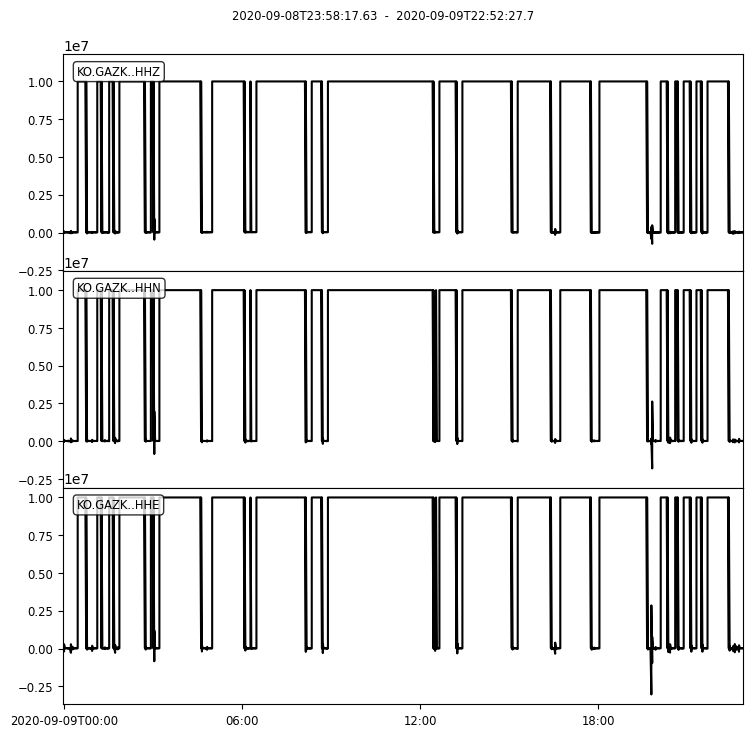

In [19]:
st.plot();

In [ ]:
def create_time_windows_only(tr, start_time, end_time):
    """
    Create 30-second time windows from a trace within the given time range.
    """
    time_windows = []
    n_of_windows = int(end_time-start_time)/30

    for i in range(int(n_of_windows)):
        time_window = tr.slice(start_time+(i)*30, start_time + (i + 1) * 30 - (1 / tr.stats.sampling_rate)).data
        time_windows.append(time_window) 
        
    return time_windows

In [ ]:
gazk_st = obspy.read("gazk.mseed")

gazk_st.merge()

gazk_tws0 = create_time_windows_only(gazk_st[0],gazk_st[0].stats.starttime,gazk_st[0].stats.endtime)

gazk_tws0

3 Trace(s) in Stream:
KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T22:52:27.700000Z | 100.0 Hz, 8244937 samples (masked)
KO.GAZK..HHN | 2020-09-08T23:58:17.630000Z - 2020-09-09T22:52:26.010000Z | 100.0 Hz, 8244839 samples (masked)
KO.GAZK..HHZ | 2020-09-08T23:58:17.730000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 8244839 samples (masked)

In [4]:
no = 0
for tw in gazk_tws0: 
    if not np.ma.any(tw):
        no= no+1
no

2012

In [5]:
yes =0 
for tw in gazk_tws0: 
    if np.ma.any(tw):
        yes = yes +1 
yes

736

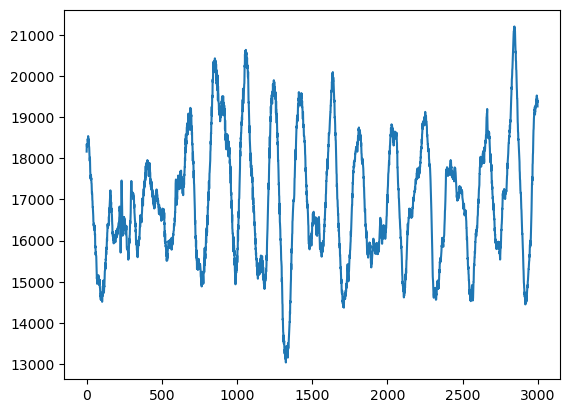

In [6]:
import matplotlib.pyplot as plt
plt.plot(gazk_tws0[100]);

In [7]:
gazk_tws0[100].any()

True

In [8]:
isinstance(gazk_tws0[100], np.ma.MaskedArray)

True

In [9]:
np.ma.count_masked(gazk_tws0[100])

0

In [10]:
gazk_st[0].stats.sampling_rate

100.0

In [23]:
(2748*30)/3600

22.9

In [4]:
preprocess_stream(gazk_st, output_dir =".")

Trace information:
Sampling rate: 100.0 Hz
Window length: 30 seconds
Number of windows: 2748
Common duration: 82447.67 seconds
Stream saved at: ./KO.GAZK.20200908_235818.npy
Shape of saved data: (2748, 3000, 3)


array([[[ 5.01041040e-02,  1.75567660e-02,  3.39077786e-02],
        [ 1.08614497e-01,  2.18541478e-03,  5.15460148e-02],
        [ 1.18552536e-01,  7.69164786e-03,  5.62747978e-02],
        ...,
        [-1.13158792e-01,  5.36020771e-02, -1.43089695e-02],
        [-9.49114040e-02,  5.43243326e-02, -7.55839935e-03],
        [-3.19862962e-02,  4.03905697e-02,  1.05573125e-02]],

       [[-4.90074381e-02, -4.30627950e-02, -3.77359502e-02],
        [-1.23082809e-01, -3.40912342e-02, -3.60727459e-02],
        [-1.42489076e-01, -2.91177221e-02, -3.42292190e-02],
        ...,
        [ 1.41467497e-01, -5.98112009e-02, -3.11468448e-02],
        [ 1.22584164e-01, -5.98120242e-02, -3.36835682e-02],
        [ 4.97390777e-02, -5.32252677e-02, -3.68051939e-02]],

       [[ 1.28126033e-02,  2.14250144e-02,  3.48284724e-03],
        [-2.49879975e-02,  5.85245676e-02, -7.40896957e-03],
        [-3.52024473e-02,  6.84096441e-02, -1.11846318e-02],
        ...,
        [ 1.07951991e-01, -7.71894008e-02,

In [5]:
gazk_npy_new = np.load('KO.GAZK.20200908_235818.npy')
gazk_npy_new

array([[[ 5.01041040e-02,  1.75567660e-02,  3.39077786e-02],
        [ 1.08614497e-01,  2.18541478e-03,  5.15460148e-02],
        [ 1.18552536e-01,  7.69164786e-03,  5.62747978e-02],
        ...,
        [-1.13158792e-01,  5.36020771e-02, -1.43089695e-02],
        [-9.49114040e-02,  5.43243326e-02, -7.55839935e-03],
        [-3.19862962e-02,  4.03905697e-02,  1.05573125e-02]],

       [[-4.90074381e-02, -4.30627950e-02, -3.77359502e-02],
        [-1.23082809e-01, -3.40912342e-02, -3.60727459e-02],
        [-1.42489076e-01, -2.91177221e-02, -3.42292190e-02],
        ...,
        [ 1.41467497e-01, -5.98112009e-02, -3.11468448e-02],
        [ 1.22584164e-01, -5.98120242e-02, -3.36835682e-02],
        [ 4.97390777e-02, -5.32252677e-02, -3.68051939e-02]],

       [[ 1.28126033e-02,  2.14250144e-02,  3.48284724e-03],
        [-2.49879975e-02,  5.85245676e-02, -7.40896957e-03],
        [-3.52024473e-02,  6.84096441e-02, -1.11846318e-02],
        ...,
        [ 1.07951991e-01, -7.71894008e-02,

In [6]:
gazk_npy_new.shape

(2748, 3000, 3)

In [4]:
mrmt_st = obspy.read('mrmt.mseed')
mrmt_st.merge()
preprocess_stream(mrmt_st, output_dir = '.')

Trace information:
Sampling rate: 100.0 Hz
Window length: 30 seconds
Number of windows: 2748
Common duration: 82447.84 seconds
Stream saved at: ./KO.MRMT.20200908_235818.npy
Shape of saved data: (2748, 3000, 3)


array([[[ 0.01130014, -0.0328052 ,  0.01492705],
        [ 0.02029998, -0.07544565,  0.01001966],
        [ 0.021192  , -0.09481964,  0.01893376],
        ...,
        [-0.02827458,  0.03548822,  0.06301969],
        [-0.01924661,  0.03450246,  0.06482261],
        [-0.00387222,  0.01111131,  0.04008903]],

       [[-0.01965723,  0.06192663,  0.00747682],
        [-0.03686351,  0.1627688 ,  0.00511759],
        [-0.04579438,  0.1881404 , -0.00209364],
        ...,
        [ 0.02313573, -0.19463788,  0.00594214],
        [ 0.01237693, -0.17087592,  0.00706286],
        [-0.00187032, -0.07262617,  0.00727422]],

       [[ 0.001032  ,  0.008923  ,  0.0153058 ],
        [ 0.02062997,  0.01586211, -0.00169711],
        [ 0.02749126,  0.01590358, -0.01468206],
        ...,
        [-0.03003592, -0.02223577, -0.01770558],
        [-0.02539446, -0.0151387 ,  0.01025228],
        [-0.01632747, -0.00303403,  0.02285951]],

       ...,

       [[ 0.00140912, -0.00930644,  0.02358693],
        [-0

In [34]:
mrmt_npy.shape

(2748, 3001, 3)

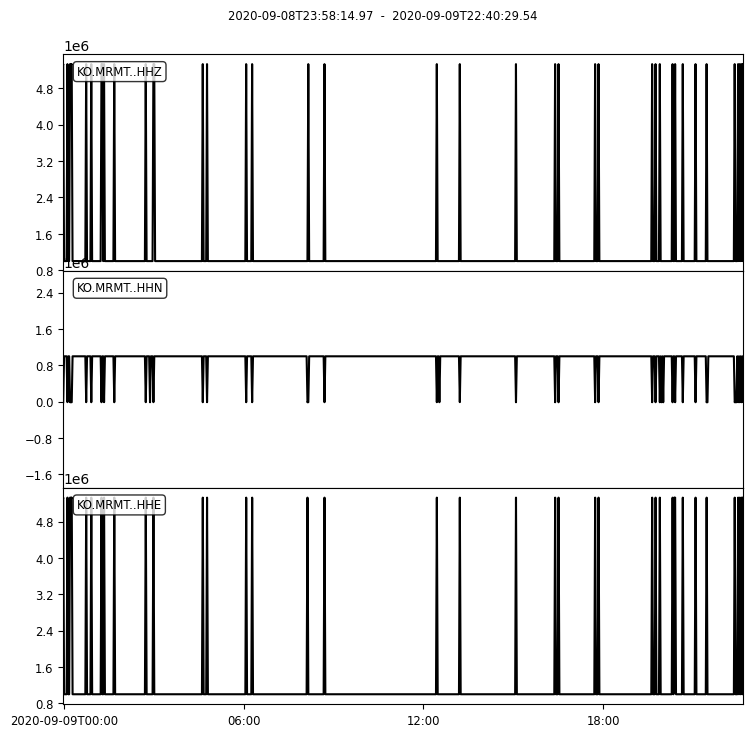

In [34]:
mrmt_st.plot();

In [5]:
krbg_st = obspy.read('krbg.mseed')
krbg_st.merge()
preprocess_stream(krbg_st, output_dir = '.')

Trace information:
Sampling rate: 100.0 Hz
Window length: 30 seconds
Number of windows: 2748
Common duration: 82447.83 seconds
Stream saved at: ./KO.KRBG.20200908_235818.npy
Shape of saved data: (2748, 3000, 6)


array([[[ 5.15072197e-02, -1.12594878e-02,  7.11495662e-03,
          6.81432313e-04, -1.08809741e-02, -2.62460057e-02],
        [ 7.25769028e-02, -4.04124381e-03,  2.80680321e-02,
         -5.51354187e-03,  7.03132898e-03, -2.39819642e-02],
        [ 7.01308027e-02,  9.47202928e-03,  3.21484469e-02,
         -1.06475987e-02,  4.60012991e-04, -8.25568195e-03],
        ...,
        [-3.76949124e-02,  3.00889295e-02, -6.90301135e-02,
         -3.70565662e-03, -5.49747935e-03,  2.31333748e-02],
        [-2.50026546e-02,  1.83865130e-02, -5.41415885e-02,
          5.24980808e-03, -3.10759377e-02,  1.52162081e-02],
        [ 1.20201325e-02, -1.41164381e-03, -2.53265537e-02,
          6.16115564e-03, -3.20439003e-02, -8.64389259e-03]],

       [[-1.33576309e-02,  5.23373634e-02, -2.51902291e-03,
          2.18532383e-02,  2.61495337e-02, -2.52157319e-02],
        [ 1.29352147e-02,  7.40155429e-02, -4.43293303e-02,
          2.05435455e-02,  2.58761551e-03, -1.39761381e-02],
        [ 2.35695

In [3]:
susr_st = obspy.read('susr.mseed')

In [4]:
susr_st

6 Trace(s) in Stream:
KO.SUSR..HNE | 2020-01-11T09:54:36.260000Z - 2020-01-11T10:06:47.650000Z | 100.0 Hz, 73140 samples
KO.SUSR..HNE | 2020-01-11T03:31:13.080000Z - 2020-01-11T03:43:17.890000Z | 100.0 Hz, 72482 samples
KO.SUSR..HNN | 2020-01-11T09:54:40.220000Z - 2020-01-11T10:06:46.120000Z | 100.0 Hz, 72591 samples
KO.SUSR..HNN | 2020-01-11T03:31:12.900000Z - 2020-01-11T03:43:18.600000Z | 100.0 Hz, 72571 samples
KO.SUSR..HNZ | 2020-01-11T09:54:34.370000Z - 2020-01-11T10:06:47.320000Z | 100.0 Hz, 73296 samples
KO.SUSR..HNZ | 2020-01-11T03:31:10.260000Z - 2020-01-11T03:43:23.160000Z | 100.0 Hz, 73291 samples

In [5]:
susr_st.merge()

3 Trace(s) in Stream:
KO.SUSR..HNE | 2020-01-11T03:31:13.080000Z - 2020-01-11T10:06:47.650000Z | 100.0 Hz, 2373458 samples (masked)
KO.SUSR..HNZ | 2020-01-11T03:31:10.260000Z - 2020-01-11T10:06:47.320000Z | 100.0 Hz, 2373707 samples (masked)
KO.SUSR..HNN | 2020-01-11T03:31:12.900000Z - 2020-01-11T10:06:46.120000Z | 100.0 Hz, 2373323 samples (masked)

In [6]:
preprocess_stream(susr_st, output_dir = '.')

Trace information:
Sampling rate: 100.0 Hz
Window length: 30 seconds
Number of windows: 791
Common duration: 23733.04 seconds
Stream saved at: ./KO.SUSR.20200111_033113.npy
Shape of saved data: (791, 3000, 3)


array([[[ 1.65953618e-02, -3.98860575e-04,  2.66132783e-03],
        [-1.53526012e-02,  3.29994410e-03,  1.13157267e-02],
        [-2.64266320e-02, -4.34392737e-03,  1.48938000e-02],
        ...,
        [-2.32701469e-02, -3.76973003e-02, -1.76066358e-04],
        [ 1.56360660e-02, -3.77623551e-02, -2.68296542e-04],
        [ 3.45161445e-02, -1.91025026e-02, -1.42359082e-03]],

       [[-1.45198302e-02, -1.42554687e-02, -2.63424646e-02],
        [ 1.21991560e-02,  1.34613633e-03, -2.04888955e-02],
        [ 1.96385961e-02,  1.34468880e-02, -7.15557399e-05],
        ...,
        [-9.73602815e-04,  2.06379797e-02,  2.18394473e-02],
        [-2.58607939e-02, -1.21534569e-03,  1.11204963e-02],
        [-3.33075374e-02, -1.64168458e-02, -1.11477571e-02]],

       [[-3.27129476e-02, -2.87696086e-02, -3.25261876e-02],
        [-7.80078862e-03, -2.86190920e-02, -3.71681377e-02],
        [ 2.85836495e-02, -3.21199000e-03, -1.93210114e-02],
        ...,
        [-3.36166918e-02,  1.62612889e-02,